# Homework 4 - Duc Trinh

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import mnist

## Exercise 1

### a)

In [3]:
def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

In [4]:
x_values = np.linspace(-10, 20, 1500)
y_values = curve_generator(x_values, 0.8)

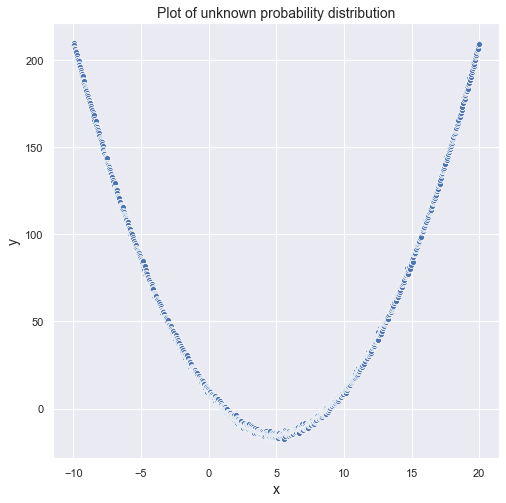

In [5]:
plt.figure(figsize = (8, 8))
plt.title(label = "Plot of unknown probability distribution", fontsize = 14)
plt.xlabel(xlabel = "x", fontsize = 14)
plt.ylabel(ylabel = "y", fontsize = 14)
_ = sns.scatterplot(x_values,y_values, sizes = 0.5)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.33, random_state = 23)

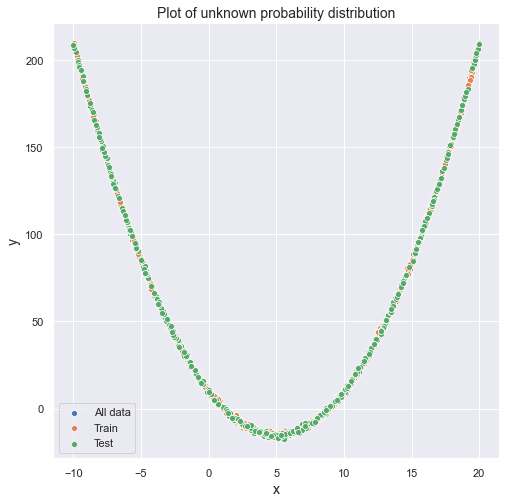

In [7]:
plt.figure(figsize = (8, 8))
plt.title(label = "Plot of unknown probability distribution", fontsize = 14)
plt.xlabel(xlabel = "x", fontsize = 14)
plt.ylabel(ylabel = "y", fontsize = 14)
_ = sns.scatterplot(x_values,y_values, sizes = 0.25, legend = "full")
_ = sns.scatterplot(x_train, y_train, sizes = 0.25, legend = "full")
_ = sns.scatterplot(x_test, y_test, sizes = 0.25, legend = "full")
_ = plt.legend(("All data", "Train", "Test"), loc = 0)

### b)

In [8]:
rmse_train = np.zeros(21)
rmse_test = np.zeros(21)

In [9]:
for i in range (0, 21):
    model = np.poly1d(np.polyfit(x_train, y_train, i))
    rmse_train[i] = np.sqrt(np.mean((y_train - model(x_train)) ** 2))
    rmse_test[i] = np.sqrt(np.mean((y_test - model(x_test)) ** 2))

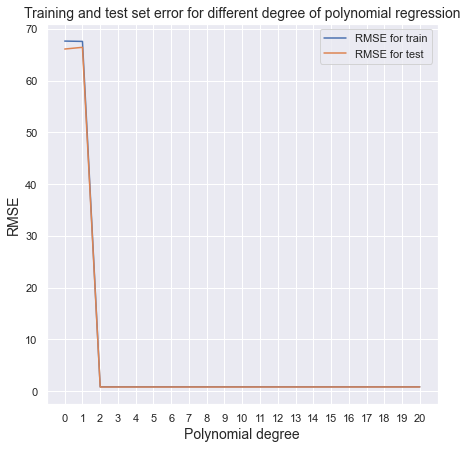

In [10]:
plt.figure(figsize = (7, 7))
plt.title(label = "Training and test set error for different degree of polynomial regression", fontsize = 14)
plt.xlabel(xlabel = "Polynomial degree", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(-1, 21)
plt.xticks(range(0,21))
_ = sns.lineplot(range(0, 21), rmse_train)
_ = sns.lineplot(range(0, 21), rmse_test)
_ = plt.legend(('RMSE for train', 'RMSE for test'), loc = 0)

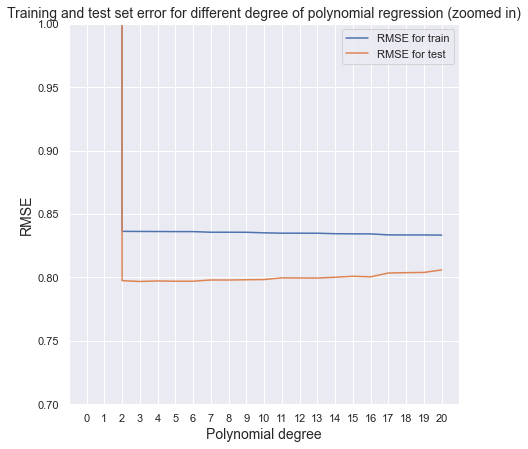

In [11]:
plt.figure(figsize = (7, 7))
plt.title(label = "Training and test set error for different degree of polynomial regression (zoomed in)", fontsize = 14)
plt.xlabel(xlabel = "Polynomial degree", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(-1, 21)
plt.xticks(range(0,21))
plt.ylim(0.7,1)
_ = sns.lineplot(range(0, 21), rmse_train)
_ = sns.lineplot(range(0, 21), rmse_test)
_ = plt.legend(('RMSE for train', 'RMSE for test'), loc = 0)

We can ignore the RMSE values for the polynomial degree 0 and 1 because these values are only based on the variance of the training set versus the variance of the test set since RMSE. In this case, it seems there is more variance in the training set than the test set, possibily due to there are more values in the training set. Otherwise, for any polynomial degree bigger than 1, it is quite clear that the test error is always higher than the training error. We are not Nate Silver after all. Furthermore, we can see that the training error is decreasing as an effect of the increase in polynomial degree that led to a more complex model. At the same time, we can see the effect of overfitting as our testing error increases as the model complexity/polynomial degree increases.

### c)

In [12]:
degrees = [1,2,5,10] #degree of models
sizes = range(500, 4250, 250) #the different original training set size

In [13]:
rmse_train= np.zeros((len(degrees), len(sizes)))
rmse_test = np.zeros((len(degrees), len(sizes)))

In [14]:
iterDeg = 0
iterSize = 0
for deg in degrees:
    for size in sizes:
        x_values = np.linspace(-10, 20, size)
        y_values = curve_generator(x_values, 0.8)
        x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.33, random_state = 23)
        model = np.poly1d(np.polyfit(x_train, y_train, deg))
        rmse_train[iterDeg][iterSize] = np.sqrt(np.mean((y_train - model(x_train)) ** 2))
        rmse_test[iterDeg][iterSize] = np.sqrt(np.mean((y_test - model(x_test)) ** 2))
        iterSize = (iterSize+1)%len(sizes)
    iterDeg = (iterDeg+1)%len(degrees)

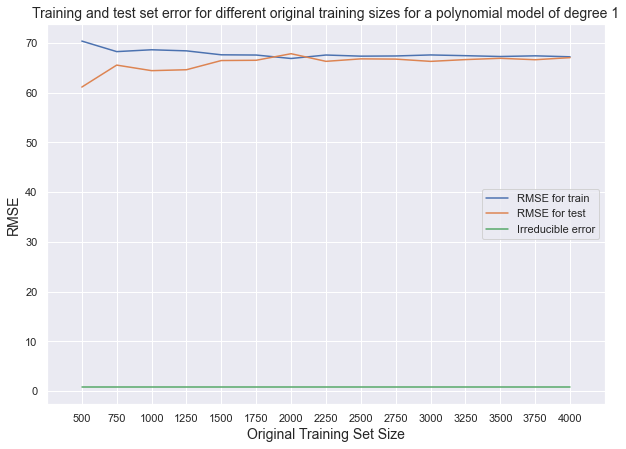

In [15]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 1", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[0])
_ = sns.lineplot(sizes, rmse_test[0])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

As expected from the previous part, with a polynomial model degree of size 1, we can see that the training error and the testing error are very big. Furtheremore, they are both heavily reliance on the variance in the training set versus the test set. As the training set is always bigger than the test set, there seems to be a a higher variance in the training set in comparision to the test set. Hence, for almost all original training set size, the testing error is smaller than the training error for a polynomial of degree 1.

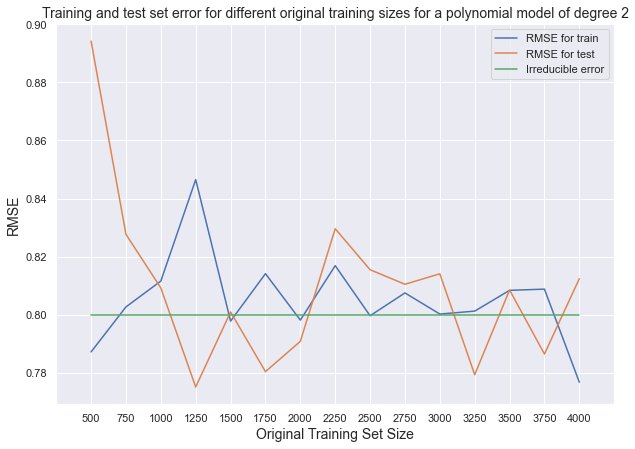

In [16]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 2", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[1])
_ = sns.lineplot(sizes, rmse_test[1])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

For a polynomial of degree 2, it seems that for most original training set sizes, the training error is smaller than the testing error. The absolute difference between the errors are not big. Furthermore, the training error and the testing error all seems to hover around the irreducible error, and do not seem to be able to go much lower than that. 

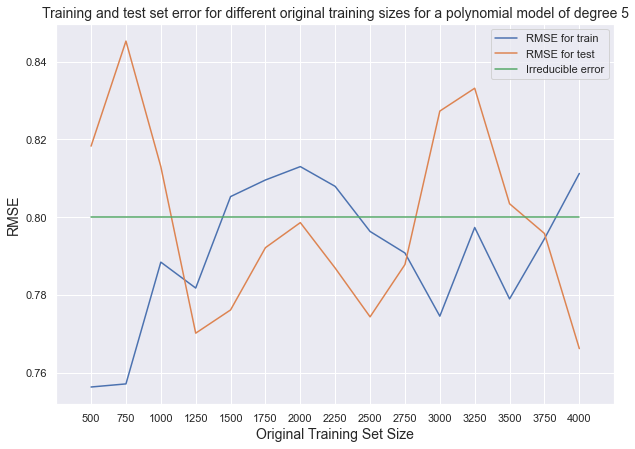

In [17]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 5", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[2])
_ = sns.lineplot(sizes, rmse_test[2])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

Similarly, for a polynomial of degree 5, it seems that for most original training set sizes, the training error is smaller than the testing error. The absolute difference between the errors are not big. Furthermore, the training error and the testing error all seems to hover around the irreducible error, and do not seem to be able to go much lower than that. 

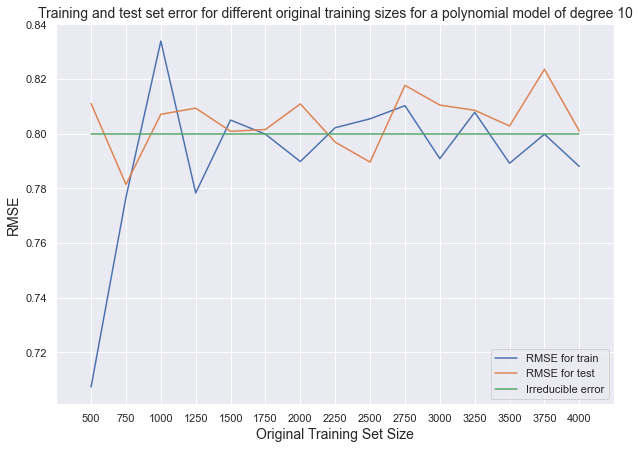

In [18]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 10", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[3])
_ = sns.lineplot(sizes, rmse_test[3])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

Similarly, for a polynomial of degree 10, it seems that for most original training set sizes, the training error is smaller than the testing error. The absolute difference between the errors are not big. Furthermore, the training error and the testing error all seems to hover around the irreducible error, and do not seem to be able to go much lower than that. 

## Exercise 2